In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Alcohol_Sales.csv')

In [3]:
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [4]:
df.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [5]:

# Renaming columns
df.columns = ["Month", "Sales"]
df.head()

,Month,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [6]:

## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,Month,Sales
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Sales
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [10]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [12]:
df.set_index('Month',inplace=True)
df.head()


,Sales
Month,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [13]:
df.describe()

,Sales
count,323.000000
mean,7895.473684
std,2920.998829
min,3031.000000
25%,5225.000000
50%,7483.000000
75%,10016.000000
max,15504.000000


<Axes: xlabel='Month'>

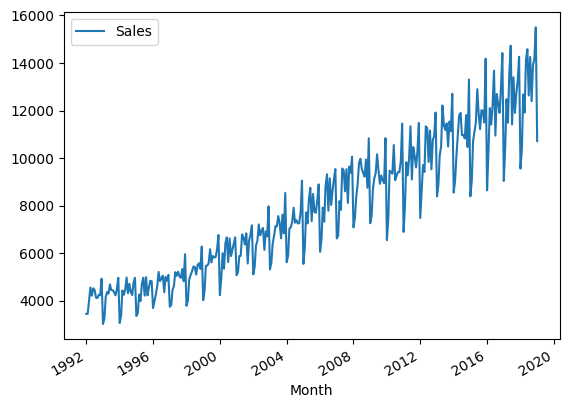

In [14]:

df.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [17]:
adfuller_test(df['Sales'])

ADF Test Statistic : 1.9835567705081045
p-value : 0.9986512002456515
#Lags Used : 17
Number of Observations Used : 305
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Sales'].shift(1)

,Sales
Month,
1992-01-01,NaN
1992-02-01,3459.0
1992-03-01,3458.0
1992-04-01,4002.0
1992-05-01,4564.0
...,...
2018-09-01,14257.0
2018-10-01,12396.0
2018-11-01,13914.0


In [19]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1992-01-01,3459,NaN,NaN
1992-02-01,3458,-1.0,NaN
1992-03-01,4002,544.0,NaN
1992-04-01,4564,562.0,NaN
1992-05-01,4221,-343.0,NaN
1992-06-01,4529,308.0,NaN
1992-07-01,4466,-63.0,NaN
1992-08-01,4137,-329.0,NaN
1992-09-01,4126,-11.0,NaN


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.5794409359526558
p-value : 0.006166457871590154
#Lags Used : 13
Number of Observations Used : 297
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

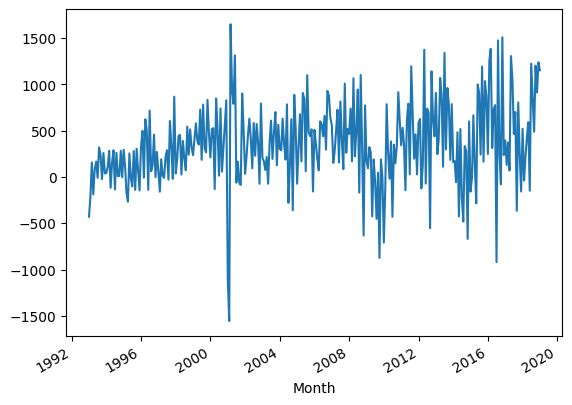

In [21]:
df['Seasonal First Difference'].plot()

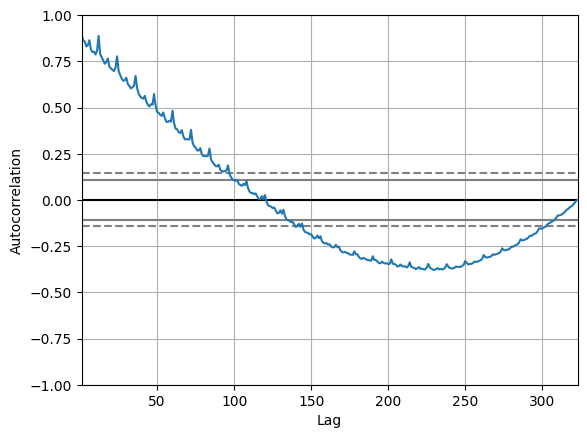

In [22]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [29]:
pip install --upgrade statsmodels

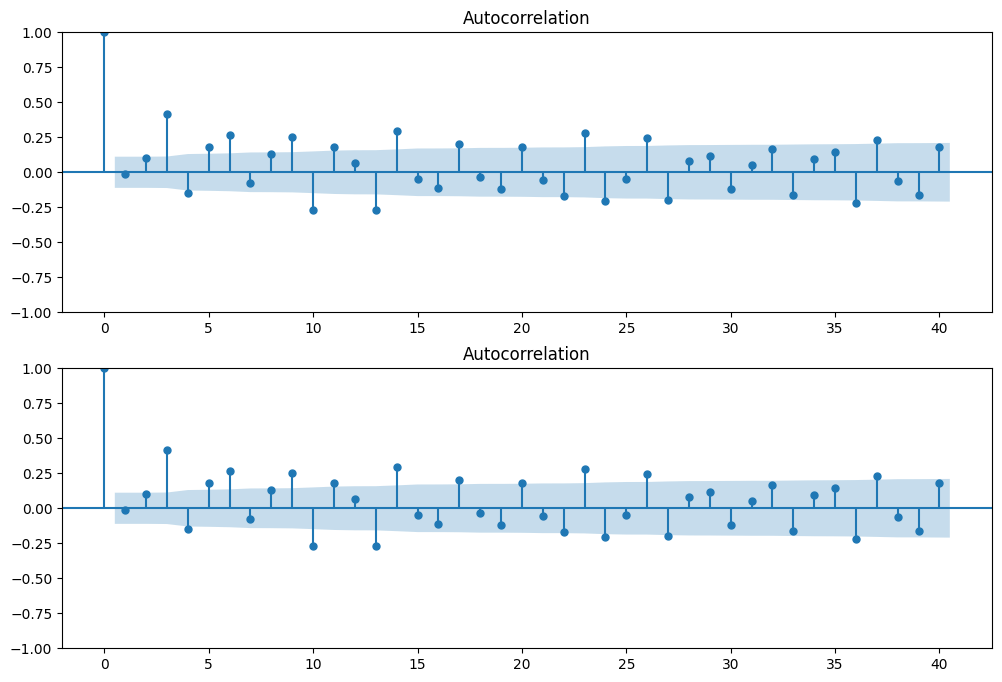

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm
# Create a figure with a specified size
fig = plt.figure(figsize=(12, 8))

# Add a subplot for the ACF plot
ax1 = fig.add_subplot(211)
# Plot the ACF of the time series
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)


# Add a subplot for the PACF plot
ax2 = fig.add_subplot(212)
# Plot the PACF of the time series


fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)




In [34]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [36]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  323
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2694.931
Date:                Wed, 02 Apr 2025   AIC                           5395.862
Time:                        10:01:51   BIC                           5407.185
Sample:                             0   HQIC                          5400.382
                                - 323                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0736      0.061      1.209      0.227      -0.046       0.193
ma.L1         -0.8742      0.029    -30.025      0.000      -0.931      -0.817
sigma2      1.079e+06   8.13e+04     13.276      0.000    9.19e+05    1.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                77.14
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               5.05   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

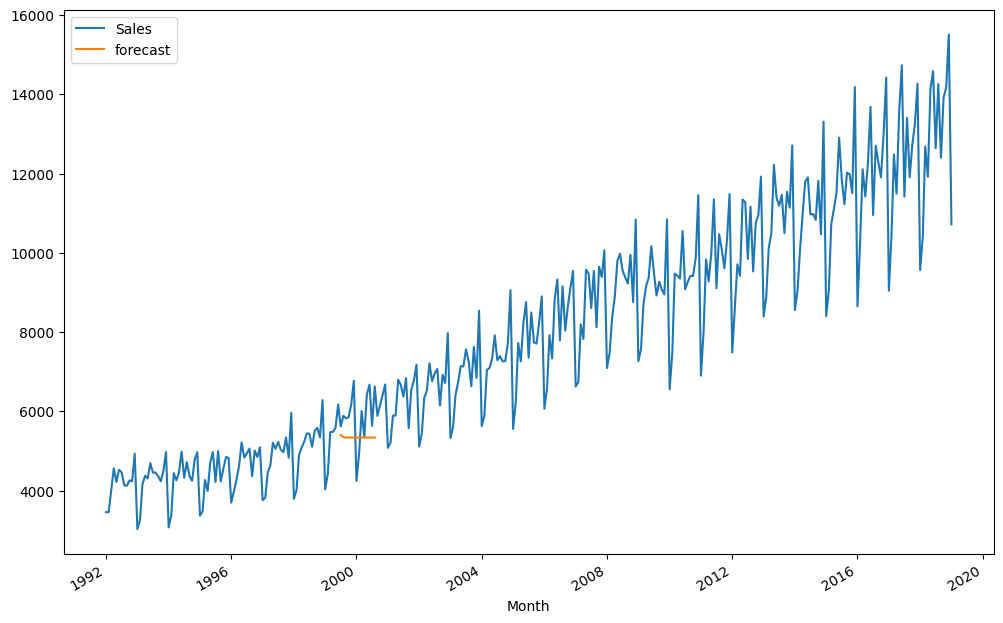

In [40]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [41]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

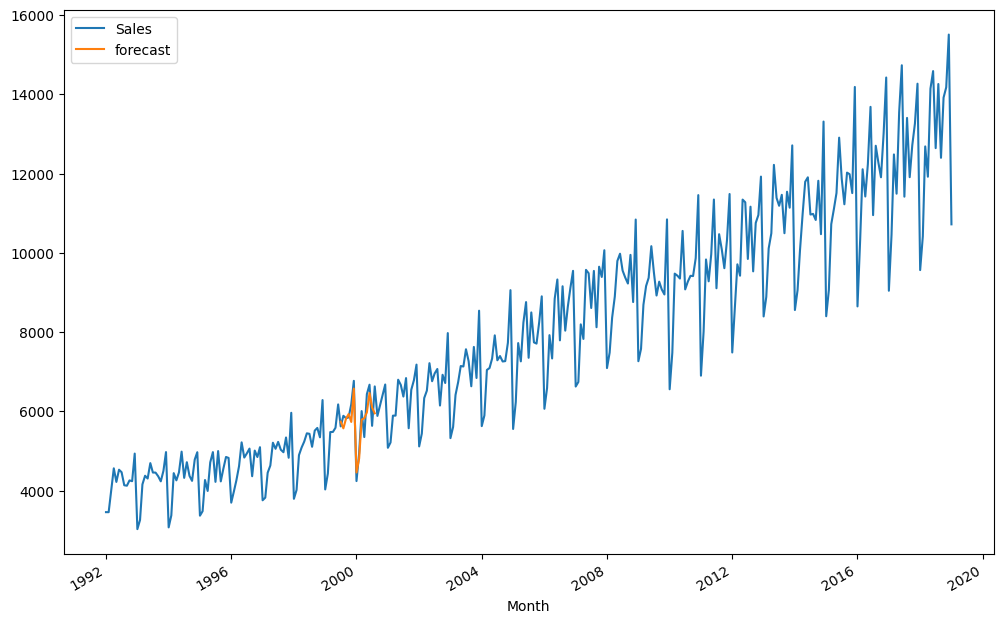

In [42]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))


In [43]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [44]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
2020-08-01,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN
2020-10-01,NaN,NaN,NaN,NaN
2020-11-01,NaN,NaN,NaN,NaN
2020-12-01,NaN,NaN,NaN,NaN


In [45]:
future_df=pd.concat([df,future_datest_df])


<ipython-input-45-4cc8c9eff41a>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

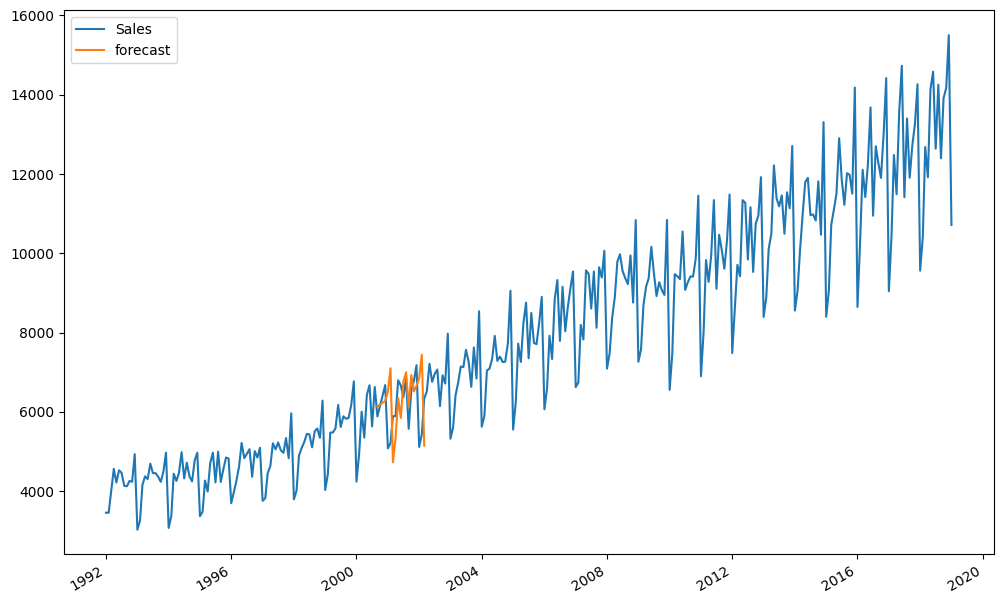

In [46]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))